In [1]:
# basic 
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# get data
import pandas_datareader as pdr

# virsual
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#time
from datetime import datetime

### 回顾之前获取数据

In [2]:
start = datetime(2015,9,20)
df = pdr.get_data_yahoo('BABA',start=start)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-21,66.400002,62.959999,65.379997,63.900002,22355100,63.900002
2015-09-22,63.270000,61.580002,62.939999,61.900002,14897900,61.900002
2015-09-23,62.299999,59.680000,61.959999,60.000000,22684600,60.000000
2015-09-24,60.340000,58.209999,59.419998,59.919998,20645700,59.919998
2015-09-25,60.840000,58.919998,60.630001,59.240002,17009100,59.240002


### 现在，同时获取多个数据

In [49]:
start = datetime(2015,9,20)
# list
company = ['AAPL','GOOG','MSFT','AMZN','FB']

In [50]:
# 这里获取时间比较长，稍等
top_df = pdr.get_data_yahoo(company,start=start)

In [86]:
#dataframe数据结构
type(top_df)

pandas.core.frame.DataFrame

In [52]:
# 这里dataframe是多维度的，维度有'Adj Close' 、'Close' 、'Open'等等
top_df.head()

Attributes   Adj Close                                                \
Symbols           AAPL        AMZN         FB        GOOG       MSFT   
Date                                                                   
2015-09-21  106.947884  548.390015  95.550003  635.440002  40.405846   
2015-09-22  105.267685  538.400024  92.959999  622.690002  40.213478   
2015-09-23  106.121704  536.070007  93.970001  622.359985  40.185997   
2015-09-24  106.752930  533.750000  94.410004  625.799988  40.222645   
2015-09-25  106.483727  524.250000  92.769997  611.969971  40.250114   

Attributes       Close                                                \
Symbols           AAPL        AMZN         FB        GOOG       MSFT   
Date                                                                   
2015-09-21  115.209999  548.390015  95.550003  635.440002  44.110001   
2015-09-22  113.400002  538.400024  92.959999  622.690002  43.900002   
2015-09-23  114.320000  536.070007  93.970001  622.359985  43.869999   
2015-09-24  115.000000  533.750000  94.410004  625.799988  43.910000   
2015-09-25  114.709999  524.250000  92.769997  611.969971  43.939999   

Attributes     ...            Open                                     \
Symbols        ...            AAPL        AMZN         FB        GOOG   
Date           ...                                                      
2015-09-21     ...      113.669998  544.330017  94.620003  634.400024   
2015-09-22     ...      113.379997  539.710022  93.769997  627.000000   
2015-09-23     ...      113.629997  538.299988  93.400002  622.049988   
2015-09-24     ...      113.250000  530.549988  93.059998  616.640015   
2015-09-25     ...      116.440002  542.570007  95.790001  629.770020   

Attributes                 Volume                                    \
Symbols          MSFT        AAPL       AMZN          FB       GOOG   
Date                                                                  
2015-09-21  43.619999  50222000.0  3283300.0  28790000.0  1788500.0   
2015-09-22  43.380001  50346200.0  3841700.0  36888900.0  2562900.0   
2015-09-23  43.930000  35756700.0  2237600.0  21701400.0  1470900.0   
2015-09-24  43.450001  50219500.0  3501000.0  29106000.0  2240100.0   
2015-09-25  44.480000  56151900.0  4031000.0  28961600.0  2174000.0   

Attributes              
Symbols           MSFT  
Date                    
2015-09-21  26177200.0  
2015-09-22  28085900.0  
2015-09-23  17145200.0  
2015-09-24  27905600.0  
2015-09-25  29384600.0  

[5 rows x 30 columns]

In [70]:
# 这里，我们选取'Adj Close'维度
top_df_adjclose = top_df['Adj Close']

# 涨跌的相关性，Relationship

In [72]:
# percent_change
top_df_adjclose_dr = top_df_adjclose.pct_change()

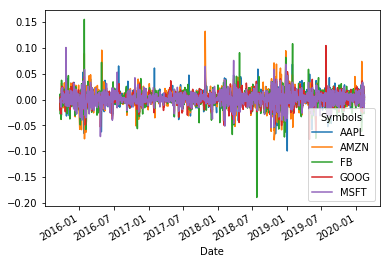

In [73]:
top_df_adjclose_dr.plot()

# seaborn 散点图 

### 两两比较

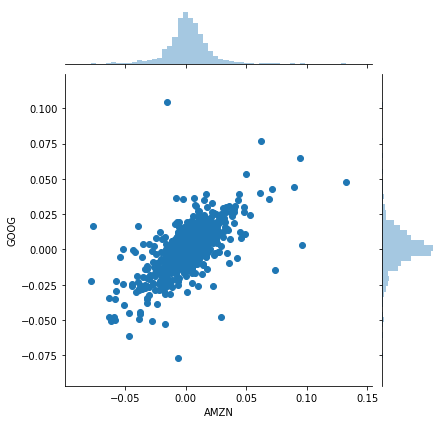

In [80]:
# 点在X=Y线上时说明两者当天的涨跌相同，由图可见，两个公司的相关性比较高。
sns.jointplot('AMZN','GOOG',top_df_adjclose_dr,kind='scatter')

### 多个同时比较

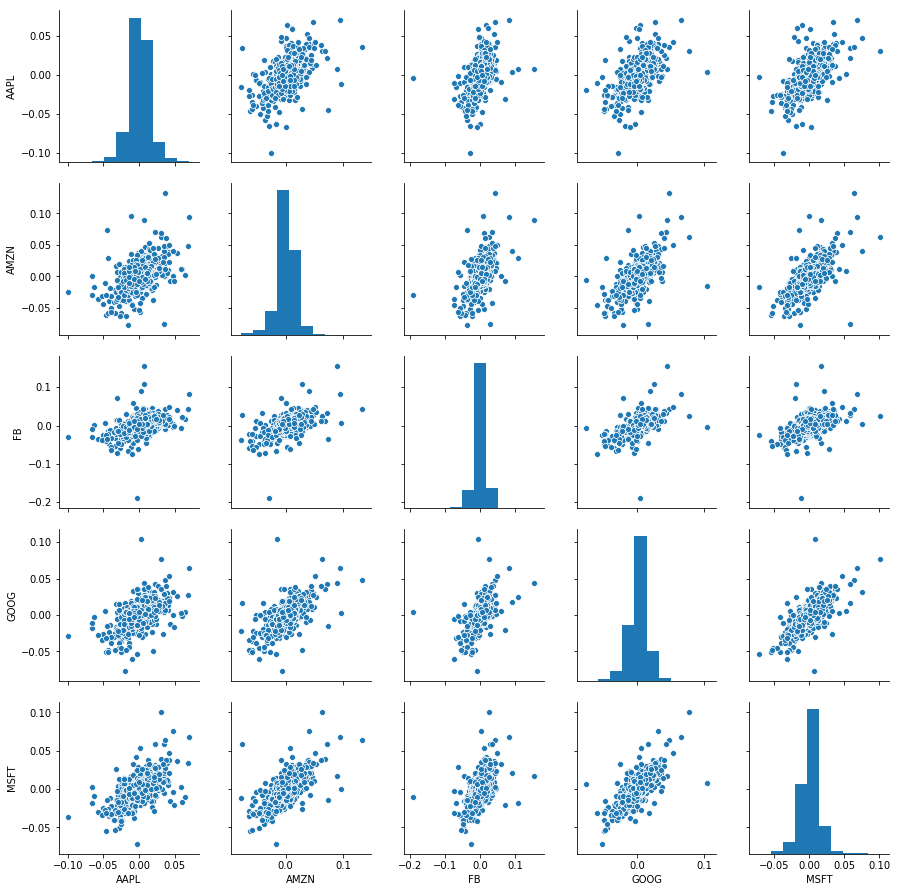

In [85]:
# 4家公司，两两比较。
sns.pairplot(top_df_adjclose_dr.dropna())